## Einleitung
Erste Schritte zum Einfinden in die Datenanalyse. Innerhalb dieses Pakets werden verschiedene Scatter sowie Boxplots visualisiert.

### Laden der Daten 
Zuerst wurden die Daten aus den CSV Dateien geladen. Die Daten wurden in einem DataFrame gespeichert.
Das DataFrame wurde dabei begrenzt, da es zu viele Datenpunkte gibt und eine Ausführung auf dem Laptop somit mit den verwendeten Ressourcen nicht möglich ist.

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned/randomized_aggregated_for_one_year.csv")

### Zusammenfassen von Zeitintervallen
Entsprechende zusätzliche Informationen wurden aus den bestehenden Daten entnommen und zusätzliche Spalten gefüllt. Dabei wurden vor allem Zeitintervalle zusammengefasst sowie die Fahrdauer berechnet.

In [116]:
# summarize time data (month/day/weekday/duration/hour)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['tpep_pickup_day_numeric'] = df['tpep_pickup_datetime'].dt.day
df['tpep_dropoff_day_numeric'] = df['tpep_dropoff_datetime'].dt.day
df['tpep_pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day_name'] = df['tpep_dropoff_datetime'].dt.day_name()
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.strftime("%w").astype(int)
df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.strftime("%w").astype(int)
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['duration_hours'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'h')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds

df['PULocationID'].fillna(-1, inplace=True)
df['DOLocationID'].fillna(-1, inplace=True)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tpep_pickup_day_numeric,tpep_dropoff_day_numeric,tpep_pickup_day_name,tpep_dropoff_day_name,tpep_pickup_day,tpep_dropoff_day,tpep_pickup_hour,tpep_dropoff_hour,duration_hours,trip_duration
0,1,2019-01-23 12:08:54,2019-01-23 12:36:03,1.0,4.10,1.0,N,246.0,236.0,1.0,...,23,23,Wednesday,Wednesday,3,3,12,12,0.452500,1629
1,2,2019-01-20 13:16:06,2019-01-20 13:40:15,1.0,15.62,1.0,N,132.0,80.0,1.0,...,20,20,Sunday,Sunday,0,0,13,13,0.402500,1449
2,1,2019-01-18 10:21:51,2019-01-18 10:26:09,1.0,0.90,1.0,N,238.0,239.0,2.0,...,18,18,Friday,Friday,5,5,10,10,0.071667,258
3,1,2019-01-14 12:13:59,2019-01-14 12:29:35,1.0,1.90,1.0,N,237.0,164.0,1.0,...,14,14,Monday,Monday,1,1,12,12,0.260000,936
4,2,2019-01-09 19:56:34,2019-01-09 19:58:38,1.0,0.45,1.0,N,42.0,42.0,1.0,...,9,9,Wednesday,Wednesday,3,3,19,19,0.034444,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839606,2,2019-06-23 12:00:24,2019-06-23 12:08:09,2.0,1.77,1.0,N,234.0,246.0,2.0,...,23,23,Sunday,Sunday,0,0,12,12,0.129167,465
2839607,2,2019-06-25 15:41:09,2019-06-25 16:02:51,1.0,2.52,1.0,N,163.0,158.0,1.0,...,25,25,Tuesday,Tuesday,2,2,15,16,0.361667,1302
2839608,2,2019-06-16 12:29:07,2019-06-16 12:49:41,2.0,9.07,1.0,N,138.0,234.0,1.0,...,16,16,Sunday,Sunday,0,0,12,12,0.342778,1234
2839609,1,2019-06-06 07:36:59,2019-06-06 07:50:49,1.0,2.10,1.0,N,142.0,186.0,1.0,...,6,6,Thursday,Thursday,4,4,7,7,0.230556,830


### Binninig: Zusammenfassung von Wertebereichen
Binning ist wichtig für spätere Auswertungen, da diese besser in Visualisierung dargestellt werden können. Grund dafür ist, dass Werte in Intervalle summiert werden. 

In [117]:
# binning
# Create the labels for the bin
bin_labels_total = [ 10, 20, 30, 50, 100, 500]
bin_labels_duration_hours = [0.05, 0.1, 0.5, 1, 5, 10]
bin_labels_tip = [ 1,2,5, 8,10]

# Define the scope of the bins
bins_total = [0, 10, 20, 30, 50, 100, 500]
bins_duration_hours = [0, 0.05, 0.1, 0.5, 1, 5, 10]
bins_tip = [0, 1, 2, 5,8 ,10]

# Create the "bins" column using the cut function using the bins and labels
df['bins_total'] = pd.cut(df['total_amount'], bins=bins_total, labels=bin_labels_total)
df['bins_duration_hours'] = pd.cut(df['duration_hours'], bins=bins_duration_hours, labels=bin_labels_duration_hours)
df['bins_tip'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=bin_labels_tip)

### Initialer Boxplot
Darstellung eines Boxplots sowie Ausgabe von statistischen Zahlen für die Einschätzung der Daten. 

**Ergebnis:**
 Zonen von 1 bis 265 vorhanden. Vor allem viele Fahrten im hohen Zonen Bereich vorhanden. Insgesamt aber eine geringe Aussagekraft, da Grund für den verschobenen Boxplot eine/mehrere summierte erhöhte Werte in Zonen im hohen Bereich vorhanden sein können. Ein geografischer Bereich kann zuzüglich nicht definiert werden, da die Zonen IDs nicht dementsprechend gruppiert sind.

count    2.839611e+06
mean     1.633330e+02
std      6.614003e+01
min     -1.000000e+00
25%      1.140000e+02
50%      1.620000e+02
75%      2.330000e+02
max      2.650000e+02
Name: PULocationID, dtype: float64


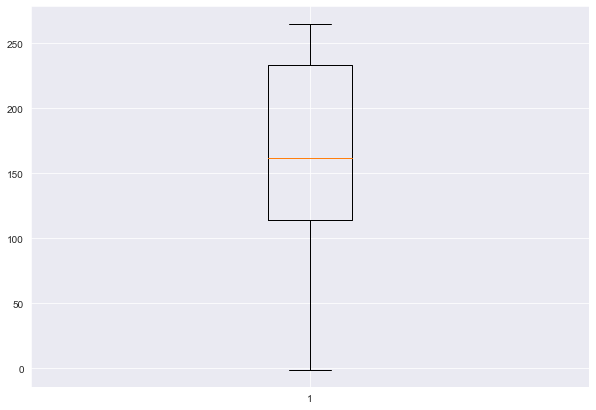

In [118]:
# boxplot
# Creating dataset
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df['PULocationID'])

# describe PUL
print(df['PULocationID'].describe())

# show plot
plt.show()

### Abhängigkeit von Fahrtantritten je Monat im Jahr


<AxesSubplot:title={'center':'Dropoff Month'}, xlabel='tpep_pickup_month', ylabel='count'>

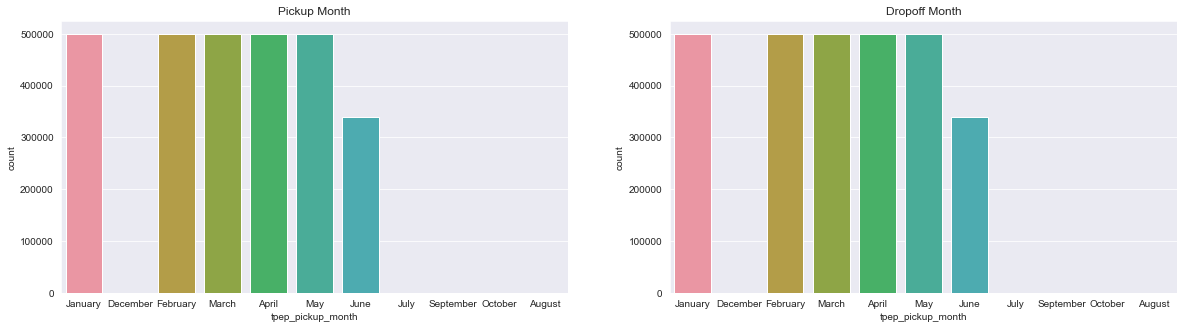

In [119]:
#trips per hour
figure,(ax01,ax02)=plt.subplots(ncols=2,figsize=(20,5))
ax01.set_title('Pickup Month')
sns.countplot(x="tpep_pickup_month",data=df,ax=ax01)
ax02.set_title('Dropoff Month')
sns.countplot(x="tpep_pickup_month",data=df,ax=ax02)

### Abhängigkeit von Fahrtantritten je Wochentag
Hier wurde die neu erstellte Dimension der Wochentage genutzt. Auch wurden die Pickups und Dropoffs gegenübergestellt.

**Ergebnis** Viele Fahrten am Donnerstag, wenige am Sonntag. --> Mögliche nicht bestätigte Schlussfolgerung kann sein, dass Bewohner Taxis mehr als Touristen nutzen.

In [ ]:
# trips per weekday
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_name",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_name",data=df,ax=ax2)

### Abhängigkeit von Fahrtantritten je Tageszeit im Stundenintervall
Die Stunden eines Tages wurden viusalisiert. Es  wurde keine Unterscheidung zwischen Wochentag und Wochenende getroffen

**Ergebnis**: Zwischen 6 Uhr und 22 Uhr sind besonders viele Fahrt zu verzeichnen. In der anderen Zeit schlafen wahrscheinlich die Bewohner/Touristen von NYC.

In [ ]:
#trips per hour
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_hour",data=df,ax=ax5)
ax6.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_hour",data=df,ax=ax6)

### Abhängigkeit von Fahrzeit und Anzahl der Passagiere
Nachfolgend wird eine mögliche Korrelation zwischen der Anzahl von Passagieren und der Dauer der Fahrt untersucht.
 
**Ergebnis**: Viele Kurzstrecken wurden durchgeführt. Darunter auch viele Fahrten mit nur einer Person. Einbruch bei 4 Passagieren ist durch den Einsatz eines Großraumtaxis ab dieser Personenanzahl  zu erklären. Im Wertebereich von 1,8 bis 6 Stunden wurden fast keine Fahrten durchgeführt. Einzelne Ausreißer sind vorhanden.

In [ ]:
#duration/passenger_count
sns.catplot(y="duration_hours",x="passenger_count",data=df,kind="strip")

### Abhängigkeit von Gesamtpreis und Monatstag
**Ergebnis**: Sehr viele Fahrten mit einem Gesamtpreis der Fahrt bis 100 Dollar. Darüber hinaus gibt es nur Ausreißer. Es werden somit viele Fahrten für bis zu 100 Dollar durchgeführt. Die Fahrten darüber hinaus werden eher selten durchgeführt. In Bezug auf den Standort NYC ist dieses als realistisch einzuordnen.  

In [ ]:
# days/total
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

### Abhängigkeit zwischen Wochentag/Dauer/Trinkgeld/Gesamtkosten
Nachfolgend soll eine Korrelation zwischen Wochentag/Dauer/Trinkgeld/Gesamtkosten untersucht werden. Als Visualiserung wurde zuerst ein Scatter Chart verwendet um die verschiedenen Dimensionen darzustellen.

**Ergebnis**: Unübersichtliche Darstellung und Dauer nicht richtig dargestellt. --> Einführung von Bins sinnvoll. (Siehe nächstes Chart)

In [ ]:
# total/tip/duration
sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day_name",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

**Ergebnis**: Die Dimension der Dauer konnte erfolgreich abgebildet werden. Trotzdem ist die Darstellung unübersichtlich. Kein brauchbarer Informationsgehalt. --> Einführung von Gruppen zusätzlich zu dem Binning (siehe nächstes Chart)

In [ ]:
# total/tip/bin_duration
sns.relplot(x="total_amount", y="tip_amount", size="bins_duration_hours", hue="tpep_pickup_day",  sizes=(5,400),          alpha=0.5,  palette="muted",height=8,data=df)

Es wurde nach Wochentag gruppiert. Es wurde der Durchschnitt verwendet.

**Ergebnis**: Durchschnittlicher Betrag der Gesamtkosten betragen zwischen 14,3 Dollar und 15,9 Dollar. Die durchschnittliche Dauer beträgt zwischen 10,4 und 10,9 Minuten. Das durchschnittliche Trinkgeld beläuft sich auf 1,6 Dollar bis 1,9 Dollar. Es ist somit eine realtiv geringe Abweichung zwischen den einzelnen Wochentagen vorhanden.
Herauszustellen ist dabei aber, dass am Donnerstag (Tag 4) eine besonders hoher durchschnittlicher Gesamtpreis sowie Trinkgeld zu verzeichenen ist. Am Wochende werden relativ kostengünstige Fahrten durchgeführt. Auch ist hier das Trinkgeld geringer. Es ist zudem ein korrelierender Zusammenhang zwischen Gesamtpreis und Trinkgeld zu verzeichnen.

In [ ]:
# total/tip/bin_duration (mean)
df_week_days = df.groupby(["tpep_pickup_day"]).mean()

sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day",  sizes=(100,1000),          alpha=0.5,  palette="muted",height=8,data=df_week_days)